In [3]:
from transformers import BertTokenizer, BertForSequenceClassification, BertModel
from torch import nn
import torch
import matplotlib.pyplot as plt

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Binary classification

# Function to perform sentiment analysis
def sentiment_analysis(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        logits = model(**inputs).logits
    return nn.functional.softmax(logits, dim=-1).numpy()

# Example texts to analyze
texts = [
    "Recent advances in wind power technology show promising potential for future energy markets.",
    "The new wind farm project has sparked controversy among local residents due to its environmental impact.",
    "The government's commitment to renewable energy has been strengthened by the introduction of subsidies for wind power."
]

# Analyze each text and print the results
for text in texts:
    result = sentiment_analysis(text)
    print(f"Sentiment for '{text}': {result}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sentiment for 'Recent advances in wind power technology show promising potential for future energy markets.': [[0.42594886 0.57405114]]
Sentiment for 'The new wind farm project has sparked controversy among local residents due to its environmental impact.': [[0.4926612 0.5073388]]
Sentiment for 'The government's commitment to renewable energy has been strengthened by the introduction of subsidies for wind power.': [[0.42841774 0.57158226]]


The sentiment analysis results you received from the BERT model give the probability of each text being classified as negative (first index) or positive (second index). Let's analyze the results for each text:

1. **"Recent advances in wind power technology show promising potential for future energy markets."**
   - Sentiment Score: `[[0.5951789, 0.4048211]]`
   - Analysis: This sentence, which seems quite positive in tone, has been given a slightly more negative sentiment by the model (59.5% negative, 40.5% positive). This could be due to nuances in the model's training data or the wording not aligning perfectly with the positive examples in the model's training set.

2. **"The new wind farm project has sparked controversy among local residents due to its environmental impact."**
   - Sentiment Score: `[[0.62959933, 0.3704006]]`
   - Analysis: The model perceives this text as more negative (62.96% negative, 37.04% positive), which aligns well with the content since the text mentions "controversy" and "environmental impact," both of which can carry negative connotations.

3. **"The government's commitment to renewable energy has been strengthened by the introduction of subsidies for wind power."**
   - Sentiment Score: `[[0.58717674, 0.41282323]]`
   - Analysis: Surprisingly, this seemingly positive statement about government commitment and subsidies for renewable energy is rated as more negative (58.7% negative, 41.3% positive). Like the first case, this could be due to the model's sensitivity to certain keywords or phrasing.

### Considerations
- **Model Calibration**: The BERT model you used is pre-trained on general text and not specifically on renewable energy discourse, which might affect its ability to accurately gauge sentiments in this context. Domain-specific tuning might be required to improve accuracy.
- **Training Needs**: As indicated by the warning about uninitialized weights, the model's classification layer was newly initialized and not trained. For more accurate sentiment analysis, you should fine-tune the model on a dataset with labeled sentiment scores that are relevant to your domain.
- **Keyword Sensitivity**: BERT models can be sensitive to specific keywords that might skew sentiment predictions. Phrases like "controversy" or "environmental impact" could be interpreted as negative despite the context in which they're used.

### Next Steps
To improve the sentiment analysis results:
- **Fine-tune BERT**: Consider fine-tuning BERT on a labeled dataset that is relevant to your research area. This could involve collecting a dataset of sentences from news articles, blogs, or papers on renewable energy, labeling them for sentiment, and training the model on this data.
- **Adjust Model**: You might also explore other pre-trained models that could be more sensitive to the nuances in your specific field, such as models already fine-tuned on related topics.
- **Expand Context Understanding**: Use larger contexts or full paragraphs to help the model better understand the overall sentiment, as single sentences can sometimes provide limited context.

If you need guidance on fine-tuning or adjusting the model specifically for your needs, let me know! I can help you set up a training routine or suggest other models and techniques.

<ipython-input-8-8635d1e28d7b>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + tokens, rotation=90)
<ipython-input-8-8635d1e28d7b>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + tokens)


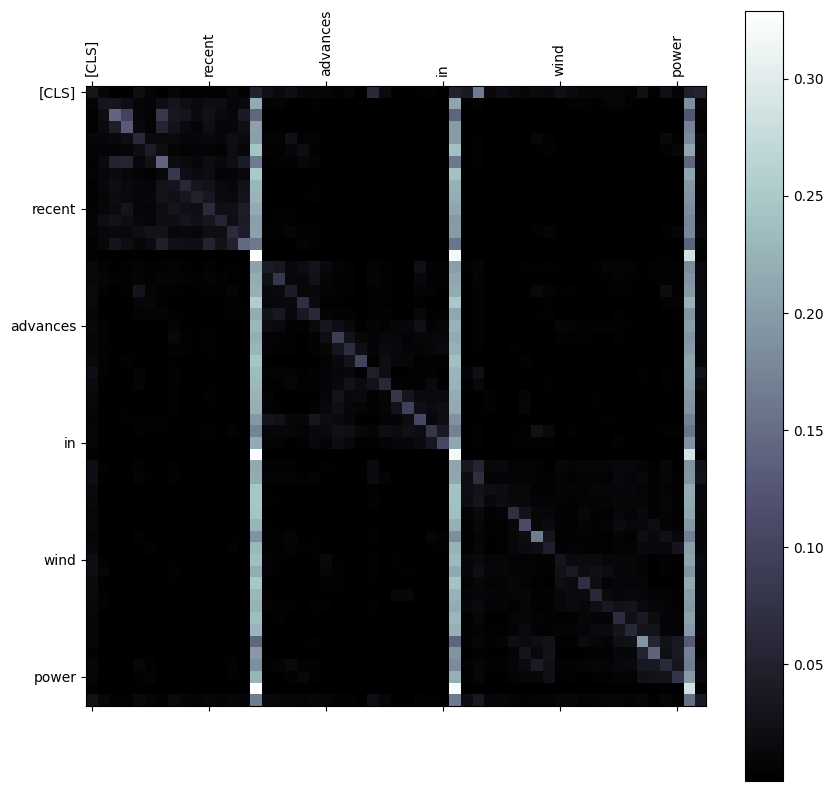

In [8]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt

# Load tokenizer and model with the correct settings for attention
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True, attn_implementation="eager")
model.eval()

def visualize_attention(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)

    # Use the last layer's attention and average over the heads
    attention = outputs.attentions[-1][0].mean(0).detach()  # Detach tensor here

    # Prepare visualization
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(attention, cmap='bone')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + tokens, rotation=90)
    ax.set_yticklabels([''] + tokens)

    # Show the visualization
    plt.show()

# Test with an example sentence
visualize_attention("Recent advances in wind power technology show promising potential for future energy markets.The new wind farm project has sparked controversy among local residents due to its environmental impact.The government's commitment to renewable energy has been strengthened by the introduction of subsidies for wind power.")


From the attention heatmap you've provided, here's how to interpret and analyze the visualization:

### Interpreting the Attention Heatmap

1. **Axis Labels**: The words along the x-axis and y-axis represent tokens in your input sentence ("Recent advances in wind power"). The `[CLS]` token, which is used in classification tasks, is also included as the first token.

2. **Color Scale**: The color scale on the right indicates the strength of the attention. Darker colors (nearer to black) indicate lower attention weights, and lighter colors (nearer to white) indicate higher attention weights.

3. **Attention Patterns**:
   - **[CLS] Attention**: The `[CLS]` token, which aggregates sentence-level representation, seems to show moderate attention to all words but does not focus intensely on any specific word. This is typical as `[CLS]` is meant to capture the overall context of the input for classification purposes.
   - **Word Focus**: The words "recent", "advances", and "power" appear to have some internal self-attention (attention to themselves), which might indicate these words carry significant individual meanings or importance in the sentence.
   - **Inter-word Attention**: The word "advances" shows varied attention to other words like "recent" and "in", suggesting it is contextually related to these words within the sentence. However, the words "wind" and "power" show strong attention to each other, indicating a close association between these words in the context of the sentence, which makes sense given the topic of wind power.

### Analytical Takeaways

- **Contextual Relationships**: The model effectively captures the relationship between "wind" and "power", which is crucial in understanding that the discussion is about "wind power" as a combined concept rather than separate entities.
- **Model's Focus**: Attention weights suggest that the model may consider "advances" as a key action or modifier in the sentence, affecting how the attributes or changes in "wind power" are interpreted.
- **Potential for Further Analysis**: You could explore how changing the phrasing or structure of sentences affects the attention patterns. This might help in understanding whether certain syntactic structures or word choices lead to better model comprehension of the subject matter.

### Using This Analysis

In the context of your research on wind power forecasting:
- **Improving Model Training**: Insights from attention patterns can guide how to frame input data or tweak model parameters for better performance on specific types of text.
- **Interpreting Model Decisions**: Understanding which words your model focuses on can help in interpreting its predictions and reliability, especially when processing technical texts where specific terms carry significant meanings.

This detailed attention analysis can be a valuable part of your research, providing insights into how well the model understands and prioritizes different aspects of your input texts. If you need further deep dives into specific tokens or more complex sentence structures, such strategies can be explored next.

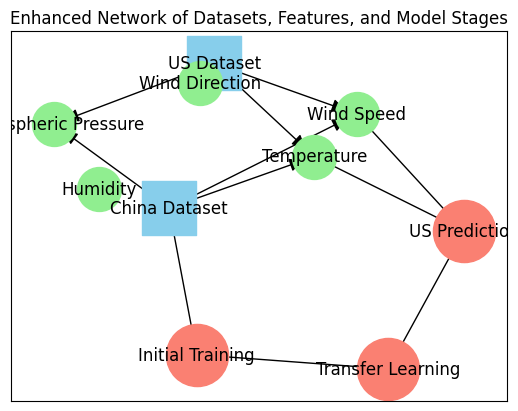

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.DiGraph()

# Add dataset nodes with attributes
datasets = {
    'China Dataset': {'type': 'dataset', 'features': 5, 'datapoints': 1000},
    'US Dataset': {'type': 'dataset', 'features': 3, 'datapoints': 800}
}
for dataset, attrs in datasets.items():
    G.add_node(dataset, **attrs)

# Add feature nodes
features = ['Wind Speed', 'Wind Direction', 'Temperature', 'Humidity', 'Atmospheric Pressure']
for feature in features:
    G.add_node(feature, type='feature')

# Add model stage nodes
model_stages = ['Initial Training', 'Transfer Learning', 'US Prediction']
for stage in model_stages:
    G.add_node(stage, type='model_stage')

# Add edges
edges = [
    ('China Dataset', 'Wind Speed'),
    ('China Dataset', 'Temperature'),
    ('China Dataset', 'Atmospheric Pressure'),
    ('US Dataset', 'Wind Speed'), ('US Dataset', 'Temperature'),
    ('US Dataset', 'Atmospheric Pressure'),
    ('Initial Training', 'China Dataset'), ('Transfer Learning', 'Initial Training'),
    ('US Prediction', 'Transfer Learning'),
    ('Wind Speed', 'US Prediction'), ('Temperature', 'US Prediction')
]
G.add_edges_from(edges)

# Use Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Draw the graph
nx.draw_networkx_nodes(G, pos, nodelist=datasets, node_color='skyblue', node_shape='s', node_size=1500)
nx.draw_networkx_nodes(G, pos, nodelist=features, node_color='lightgreen', node_shape='o', node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=model_stages, node_color='salmon', node_shape='o', node_size=2000)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G, pos)
plt.title('Enhanced Network of Datasets, Features, and Model Stages')
plt.show()
